<a href="https://colab.research.google.com/github/nevilshah444/Clustering-Techniques/blob/main/Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CMPE 255 Assignment:

Hiearchical Clustering

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
cancer=load_breast_cancer()
Data= pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
X= Data.values
y= cancer.target

In [4]:
#Lets have a quick look at the dataset
Data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
#target names of this dataset
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
X.shape
#569 rows and 30 columns

(569, 30)

#Data Transformation

In [7]:
from sklearn.preprocessing import normalize

scale = normalize(X)
scale = pd.DataFrame(scale,columns=Data.columns)
scale.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.007925,0.004573,0.054099,0.440986,0.000052,0.000122,0.000132,0.000065,0.000107,0.000035,0.000482,0.000399,0.003784,0.067580,0.000003,0.000022,0.000024,0.000007,0.000013,0.000003,0.011181,0.007635,0.081325,0.889462,0.000071,0.000293,0.000314,0.000117,0.000203,0.000052
1,0.008666,0.007486,0.055988,0.558619,0.000036,0.000033,0.000037,0.000030,0.000076,0.000024,0.000229,0.000309,0.001432,0.031209,0.000002,0.000006,0.000008,0.000006,0.000006,0.000001,0.010528,0.009862,0.066899,0.824026,0.000052,0.000079,0.000102,0.000078,0.000116,0.000038
2,0.009367,0.010109,0.061842,0.572276,0.000052,0.000076,0.000094,0.000061,0.000098,0.000029,0.000355,0.000374,0.002181,0.044731,0.000003,0.000019,0.000018,0.000010,0.000011,0.000002,0.011212,0.012145,0.072545,0.812984,0.000069,0.000202,0.000214,0.000116,0.000172,0.000042
3,0.016325,0.029133,0.110899,0.551922,0.000204,0.000406,0.000345,0.000150,0.000371,0.000139,0.000708,0.001652,0.004925,0.038925,0.000013,0.000107,0.000081,0.000027,0.000085,0.000013,0.021314,0.037881,0.141333,0.811515,0.000300,0.001238,0.000982,0.000368,0.000949,0.000247
4,0.009883,0.006985,0.065808,0.631774,0.000049,0.000065,0.000096,0.000051,0.000088,0.000029,0.000369,0.000381,0.002649,0.046002,0.000006,0.000012,0.000028,0.000009,0.000009,0.000002,0.010979,0.008120,0.074137,0.767189,0.000067,0.000100,0.000195,0.000079,0.000115,0.000037


In [16]:
#Principal Component Analysis
pca = PCA(4)
  
#Transform the data
transform = pca.fit_transform(scale)

#Hierarchical Clustering

In [9]:
import sklearn
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

**Drawing simple Dendogram**

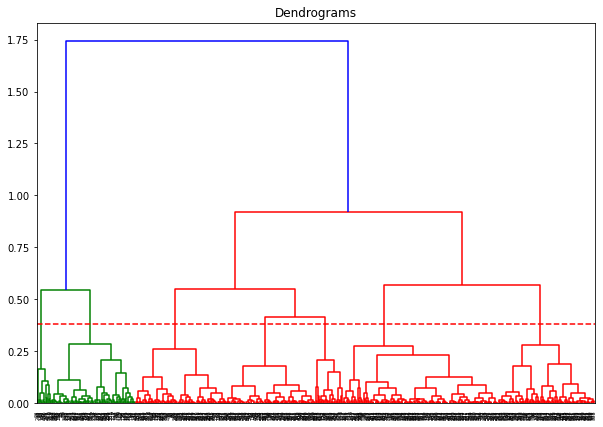

In [10]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(transform, method='ward'))
plt.axhline(y=0.38, color='r', linestyle='--')

#Clustering using Single Linkage

In [17]:
from sklearn.cluster import AgglomerativeClustering

cluster_single = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')  
cluster_single.fit_predict(transform)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

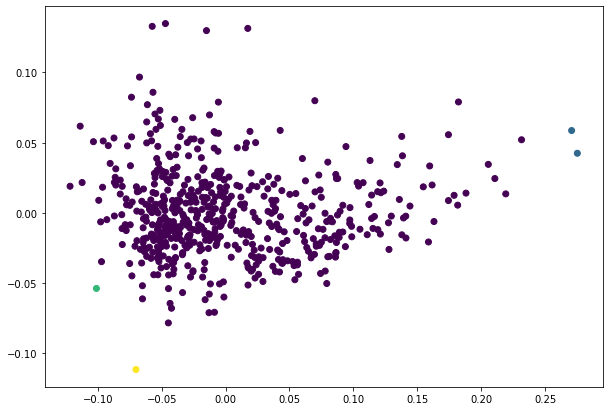

In [18]:
plt.figure(figsize=(10, 7))  
plt.scatter(transform[:,0], transform[:,1], c=cluster_single.labels_)

#Clustering using Complete Linkage

In [20]:
from sklearn.cluster import AgglomerativeClustering

cluster_single = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')  
cluster_single.fit_predict(transform)

array([1, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 1, 0, 0, 0, 3, 1, 1, 1, 3, 0, 2,
       3, 1, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 1,
       3, 3, 2, 3, 3, 3, 0, 0, 0, 3, 3, 3, 1, 3, 0, 2, 2, 2, 3, 2, 1, 3,
       2, 0, 2, 0, 1, 2, 1, 3, 3, 3, 0, 1, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 0, 2, 3, 3, 3, 2, 0, 2, 2, 3, 3, 0, 1, 3,
       2, 0, 0, 2, 2, 3, 2, 1, 1, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3,
       3, 0, 3, 3, 3, 0, 3, 0, 2, 3, 3, 3, 2, 0, 3, 0, 0, 3, 0, 2, 2, 0,
       3, 3, 3, 0, 0, 3, 3, 3, 1, 0, 3, 0, 0, 3, 1, 0, 0, 1, 3, 0, 0, 2,
       3, 0, 0, 0, 3, 1, 1, 0, 3, 3, 3, 3, 0, 0, 3, 0, 2, 3, 0, 0, 3, 0,
       3, 1, 3, 3, 0, 1, 3, 3, 2, 3, 0, 3, 3, 3, 0, 0, 3, 3, 3, 2, 1, 1,
       3, 3, 2, 3, 3, 3, 2, 0, 3, 3, 3, 0, 2, 3, 2, 0, 1, 3, 3, 3, 0, 0,
       2, 0, 0, 2, 0, 3, 3, 0, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 2, 0, 0, 2, 0, 0, 1, 2, 3, 0, 0, 0, 3, 0, 3, 3, 3, 3, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 2, 1,

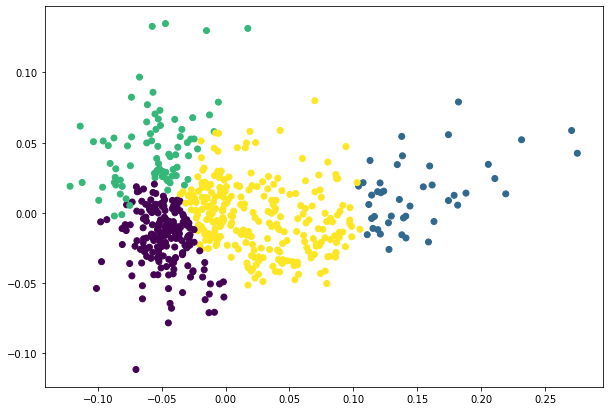

In [21]:
plt.figure(figsize=(10, 7))  
plt.scatter(transform[:,0], transform[:,1], c=cluster_single.labels_)

In [22]:
from sklearn.cluster import AgglomerativeClustering

cluster_single = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')  
cluster_single.fit_predict(transform)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

#Clustering using Average Linkage

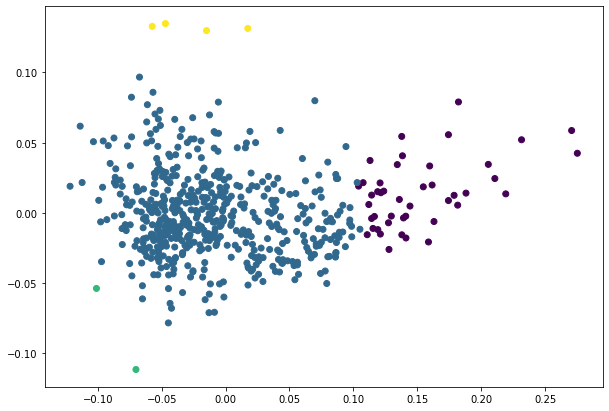

In [23]:
plt.figure(figsize=(10, 7))  
plt.scatter(transform[:,0], transform[:,1], c=cluster_single.labels_)